In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(df.isna().sum().to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

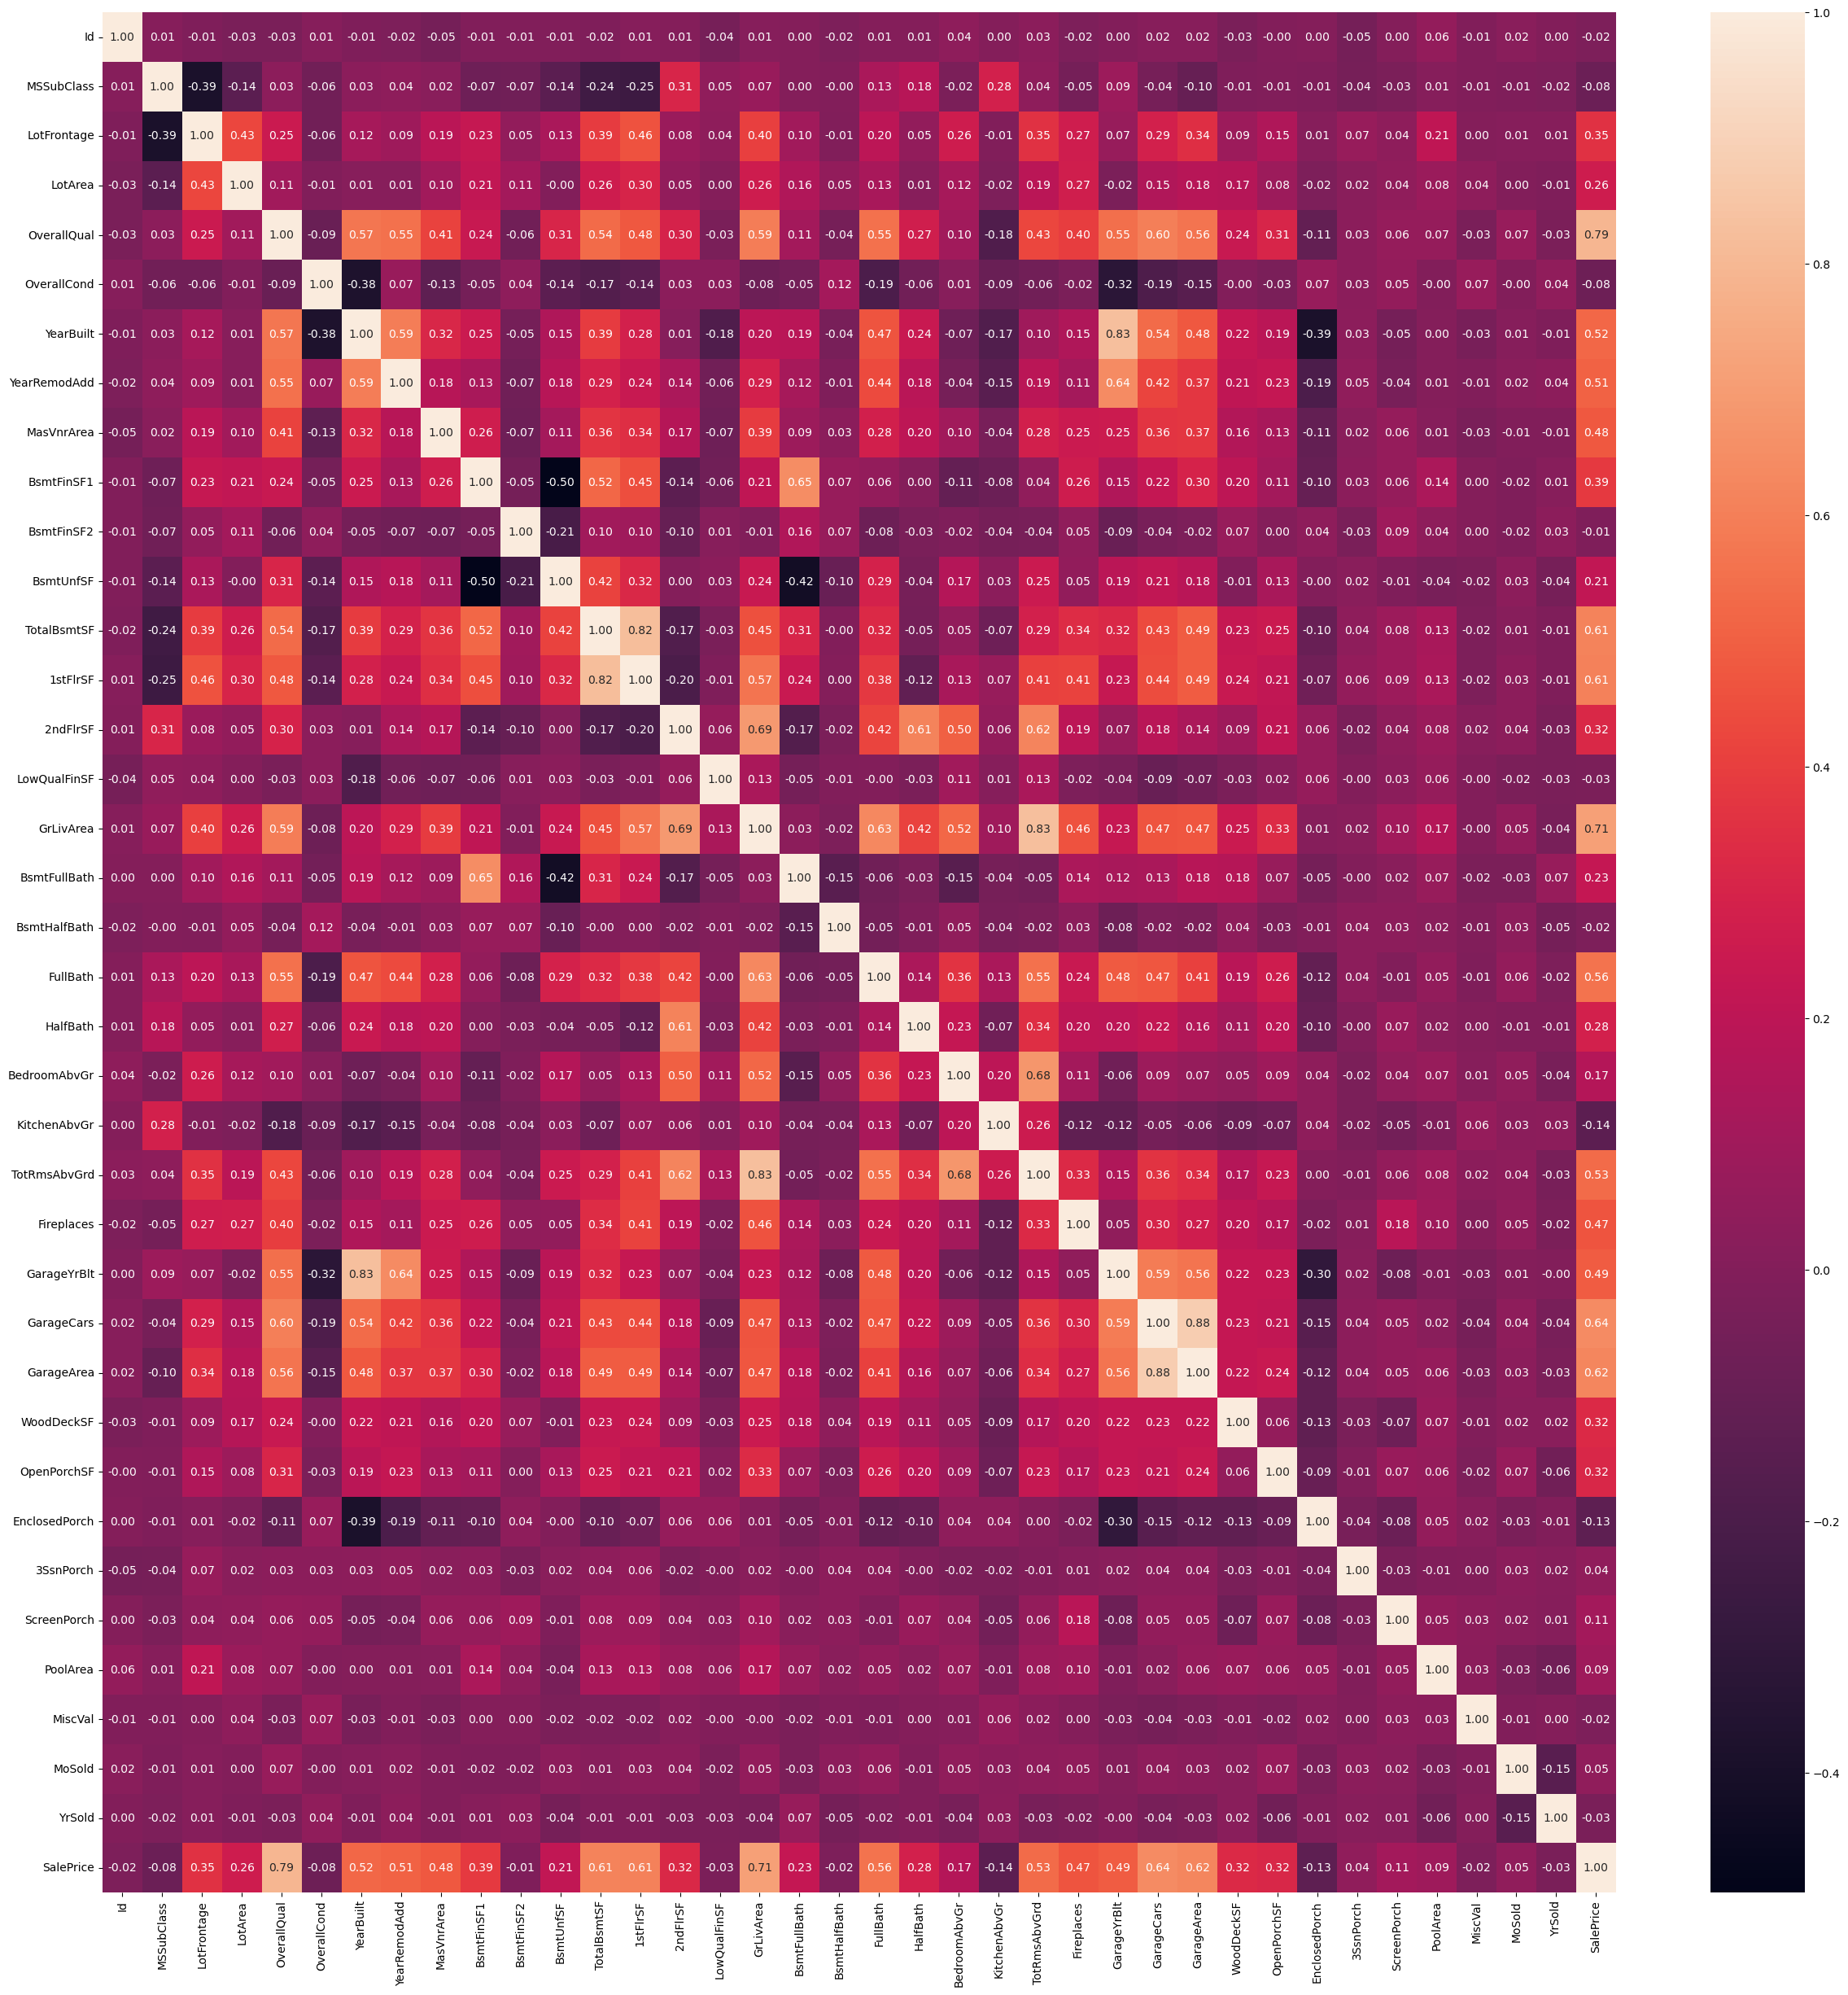

In [5]:
numeric_df=df.select_dtypes(include=['int64','float64'])
correlation_matrix=numeric_df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f")
plt.show();

In [6]:
df["HasGarage"]=df["GarageType"].isna().astype(int)
df["HasGarage"]=1-df["HasGarage"]
df["HasGarage"].value_counts()

HasGarage
1    1379
0      81
Name: count, dtype: int64

## Training The Model

In [7]:
features_set=["LotArea", "OverallQual","OverallCond","YearBuilt","YearRemodAdd",
             "BedroomAbvGr","KitchenAbvGr","Fireplaces","MiscVal","YrSold","HasGarage"]

x=df[features_set]
y=df["SalePrice"]

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x,y,random_state=42)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(x_train,y_train)

rf_predictions=rf_model.predict(x_val)
rf_mae=mean_absolute_error(rf_predictions,y_val)

print("Mean Absolute Error(Random Forest Regressor):",rf_mae)

Mean Absolute Error(Random Forest Regressor): 23535.200894977166


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dt_model=DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train,y_train)

dt_predictions=dt_model.predict(x_val)
dt_mae=mean_absolute_error(dt_predictions,y_val)

print("Mean Absolute Error(Decision Tree Regressor):",dt_mae)

Mean Absolute Error(Decision Tree Regressor): 30519.923287671234


## Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid={"n_estimators":[100,200,300],
            "max_features":["sqrt","log2"],
            "max_depth":[None,10,20],
            "min_samples_split":[2,5,7,9],
            "min_samples_leaf":[1,3,5,7]}

grid_search=GridSearchCV(RandomForestRegressor(),param_grid=param_grid,cv=5,scoring="neg_mean_squared_error")
grid_search.fit(x_train,y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 3, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [14]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [19]:
rf_model_grid=RandomForestRegressor(max_depth=20,max_features="sqrt",min_samples_leaf=1,
                                    min_samples_split=5,n_estimators=200,random_state=42)
rf_model_grid.fit(x_train,y_train)

rf_grid_predictions=rf_model_grid.predict(x_val)
rf_grid_mae=mean_absolute_error(rf_grid_predictions,y_val)

print("Mean Absolute Error(Random Forest Regressor):",rf_grid_mae)

Mean Absolute Error(Random Forest Regressor): 23849.967842699225


## Testing The Model 

In [20]:
df_test=pd.read_csv("test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [21]:
df_test["HasGarage"]=df_test["GarageType"].isna().astype(int)
df_test["HasGarage"]=1-df_test["HasGarage"]
df_test["HasGarage"].value_counts()

HasGarage
1    1383
0      76
Name: count, dtype: int64

In [22]:
test_data=df_test[features_set]

In [23]:
test_prediction=rf_model_grid.predict(test_data)

In [24]:
submission_data=pd.read_csv("sample_submission.csv")

In [25]:
submission=pd.DataFrame({
    "Id":submission_data["Id"],
    "SalePrice":test_prediction})

submission.to_csv("RandomForestRegressor_submission.csv",index=False)
print("Saved RandomForestRegressor_submission.csv")

Saved RandomForestRegressor_submission.csv
